# Make line plots

This notebook makes lines plots that show counts of patients with gain and loss events at each gene along the selected chromosome.

In [1]:
import cnvutils
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
# Load parameters
gen_params = cnvutils.load_params(os.path.join("..", "data", "gen_params.json"))
PANCAN = gen_params["PANCAN"]

chr_params = cnvutils.load_params(os.path.join("data", "chr_params.json"))
CHROMOSOME = chr_params["CHROMOSOME"]
cancer_types = chr_params["CHR_CANCER_TYPES"]

# Get cnv counts
cnv_counts = pd.read_csv(os.path.join("data", f"chr{CHROMOSOME:0>2}_cnv_counts_{'harmonized' if PANCAN else 'AWG'}.tsv"), sep='\t')

In [3]:
# I was not able to find a good library for creating a visual of a chromosome
# with their banding patterns, so I wrote this function to do it for me.

ideogram_data = cnvutils.get_cytoband_info()
chromo = ideogram_data[ideogram_data['#chromosome'] == CHROMOSOME]
colors = []
sections = list()
for index, row in chromo.iterrows():
    sections.append((row['bp_start'], row['bp_stop']-row['bp_start']))
    if row['stain'] == 'gneg':
        colors.append('white')
    elif row['stain'] == 'gpos':
        if row['density'] == 25.0:
            colors.append('lightgray')
        elif row['density'] == 50.0:
            colors.append('gray')
        elif row['density'] == 75.0:
            colors.append('darkgray')
        else:
            colors.append('black')
    elif row['stain'] == 'acen':
        colors.append('red')
    else:
        colors.append('lightgray')

brca
ccrcc
colon
endometrial
gbm
hnscc
lscc
luad
ovarian


Text(0.07, 0.5, 'Number of Samples')

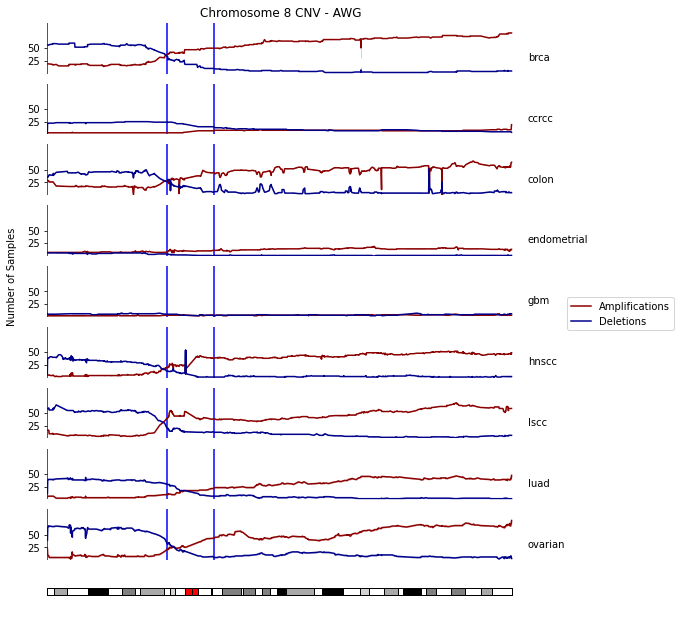

In [4]:
# Set up our axes
count = 0
end_bp = sections[len(sections) - 1][0] + sections[len(sections) - 1][1]
fig, axs = plt.subplots(nrows=len(cancer_types) + 1, sharex=True, sharey=True, num=0, figsize=(10,11))
title = f'Chromosome {CHROMOSOME} CNV - {"harmonized" if PANCAN else "AWG"}'
fig.suptitle(title, y=0.9, x=0.45)
plt.xlim(0,175138636)
plt.xlim(0,end_bp + (end_bp/5))
plt.ylim(0, 100)

# Fill in the individual plots
for cancer in cancer_types:
    print(cancer) # To keep track of how long we have left until the plot is done
    frame = cnv_counts[cnv_counts["cancer"] == cancer]
    axs[count].get_xaxis().set_visible(False)
    axs[count].set_yticks([25,50])
    axs[count].set_frame_on(False)
    axs[count].text(end_bp + 5000000, 25, cancer)
    # Testing out the location event stuff
    axs[count].axvline(52110839, 0, 75, color='b')
    axs[count].axvline(202660, 0, 75, color='b')
    axs[count].axvline(37421341, 0, 75, color='b')
    sns.lineplot(
        x="start_bp", 
        y="value", 
        hue="variable", 
        palette=['darkred', 'darkblue'], 
        data=frame, 
        ax=axs[count], 
        legend=False)
    axs[count].set_ylabel("")
    count += 1
    
# Add the chromosome banding map at the bottom
plt.broken_barh(sections, (50,15), facecolors=colors, edgecolor="black")
plt.axis('off')

# Set up the legend
red_line = mlines.Line2D([], [], color='darkred', label='Amplifications')
blue_line = mlines.Line2D([], [], color='darkblue', label='Deletions')
fig.legend(handles=[red_line, blue_line], loc='center right')

# Set the Y axis label
fig.text(0.07, 0.5, "Number of Samples", rotation="vertical")

In [5]:
chart_fmt = gen_params["CHART_FORMAT"]
chart_dpi = gen_params["CHART_DPI"]
chart_path = os.path.join(
    "data", 
    "charts_img",
    f"chr{CHROMOSOME}_02_line_plots_all_cancers_{'harmonized' if PANCAN else 'AWG'}_matplotlib.{chart_fmt}"
)
fig.savefig(chart_path, dpi=chart_dpi)